## **Necessary Imports**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## **Loading the data and data exploration**

In [13]:
df= pd.read_csv('creditcarddata.csv')

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **Correlation Matrix**

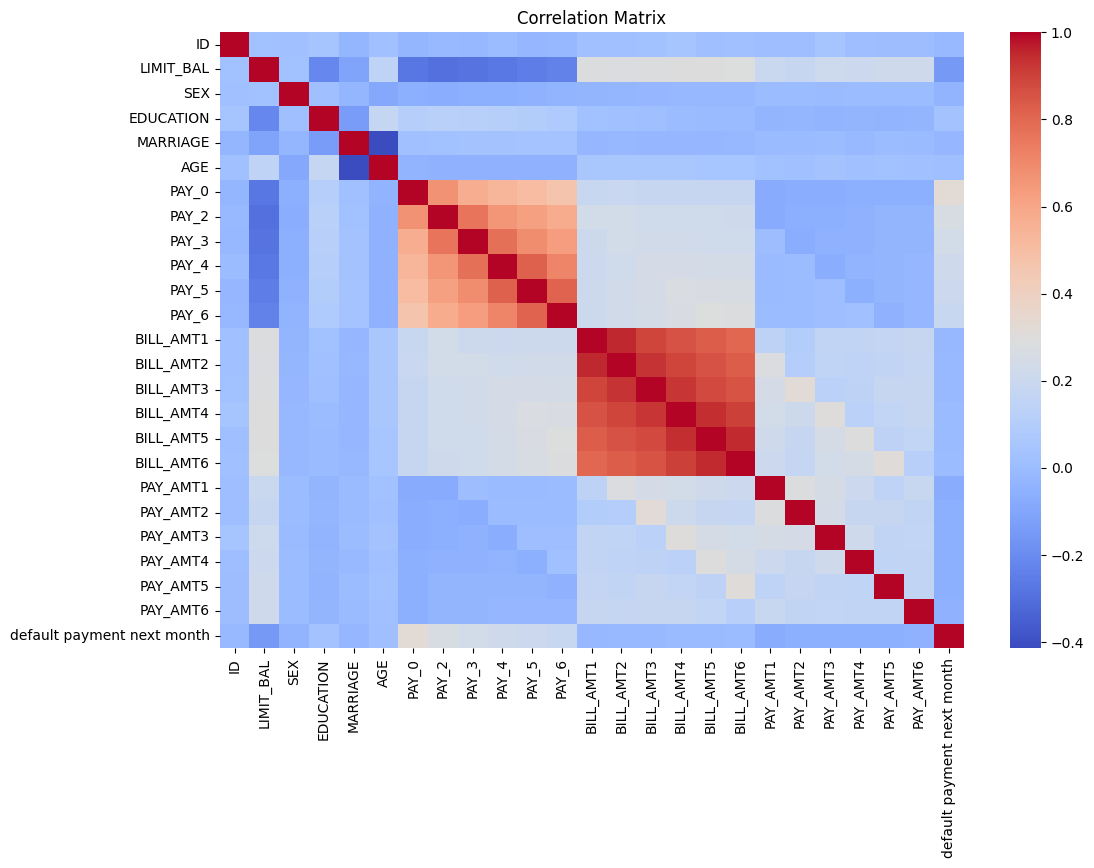

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

A correlation matrix IS a helpful step in feature selection and dimensionality reduction to avoid multicollinearity (high correlations between predictors), which can adversely affect predictive models like linear regression. When variables are highly correlated, it may be possible to remove one of the variables from the model without losing much predictive power.

### **Target Value Distribution**

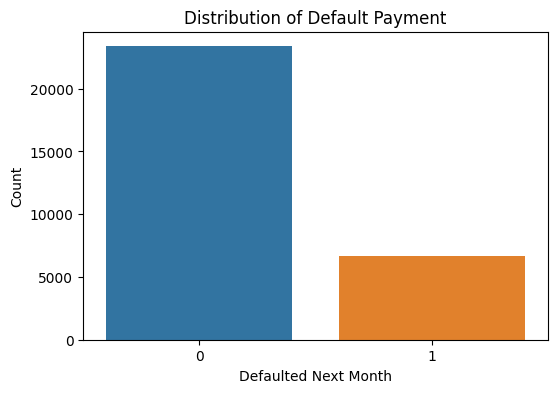

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='default payment next month', data=df)
plt.title("Distribution of Default Payment")
plt.xlabel("Defaulted Next Month")
plt.ylabel("Count")
plt.show()

This indicates that the dataset is unbalanced and skewed as one class is in majority whereas the other class is in minority as we can see a big difference in the number of samples per class

### Age Distribution

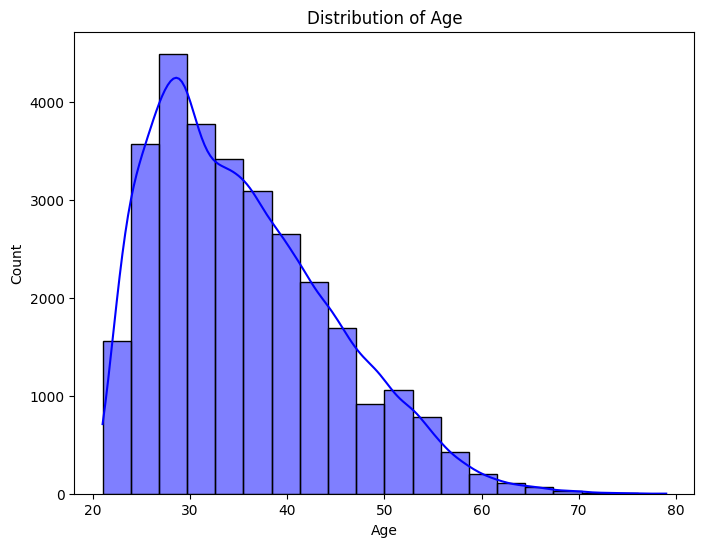

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], kde=True, color='blue', bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Pair plot of selected variables

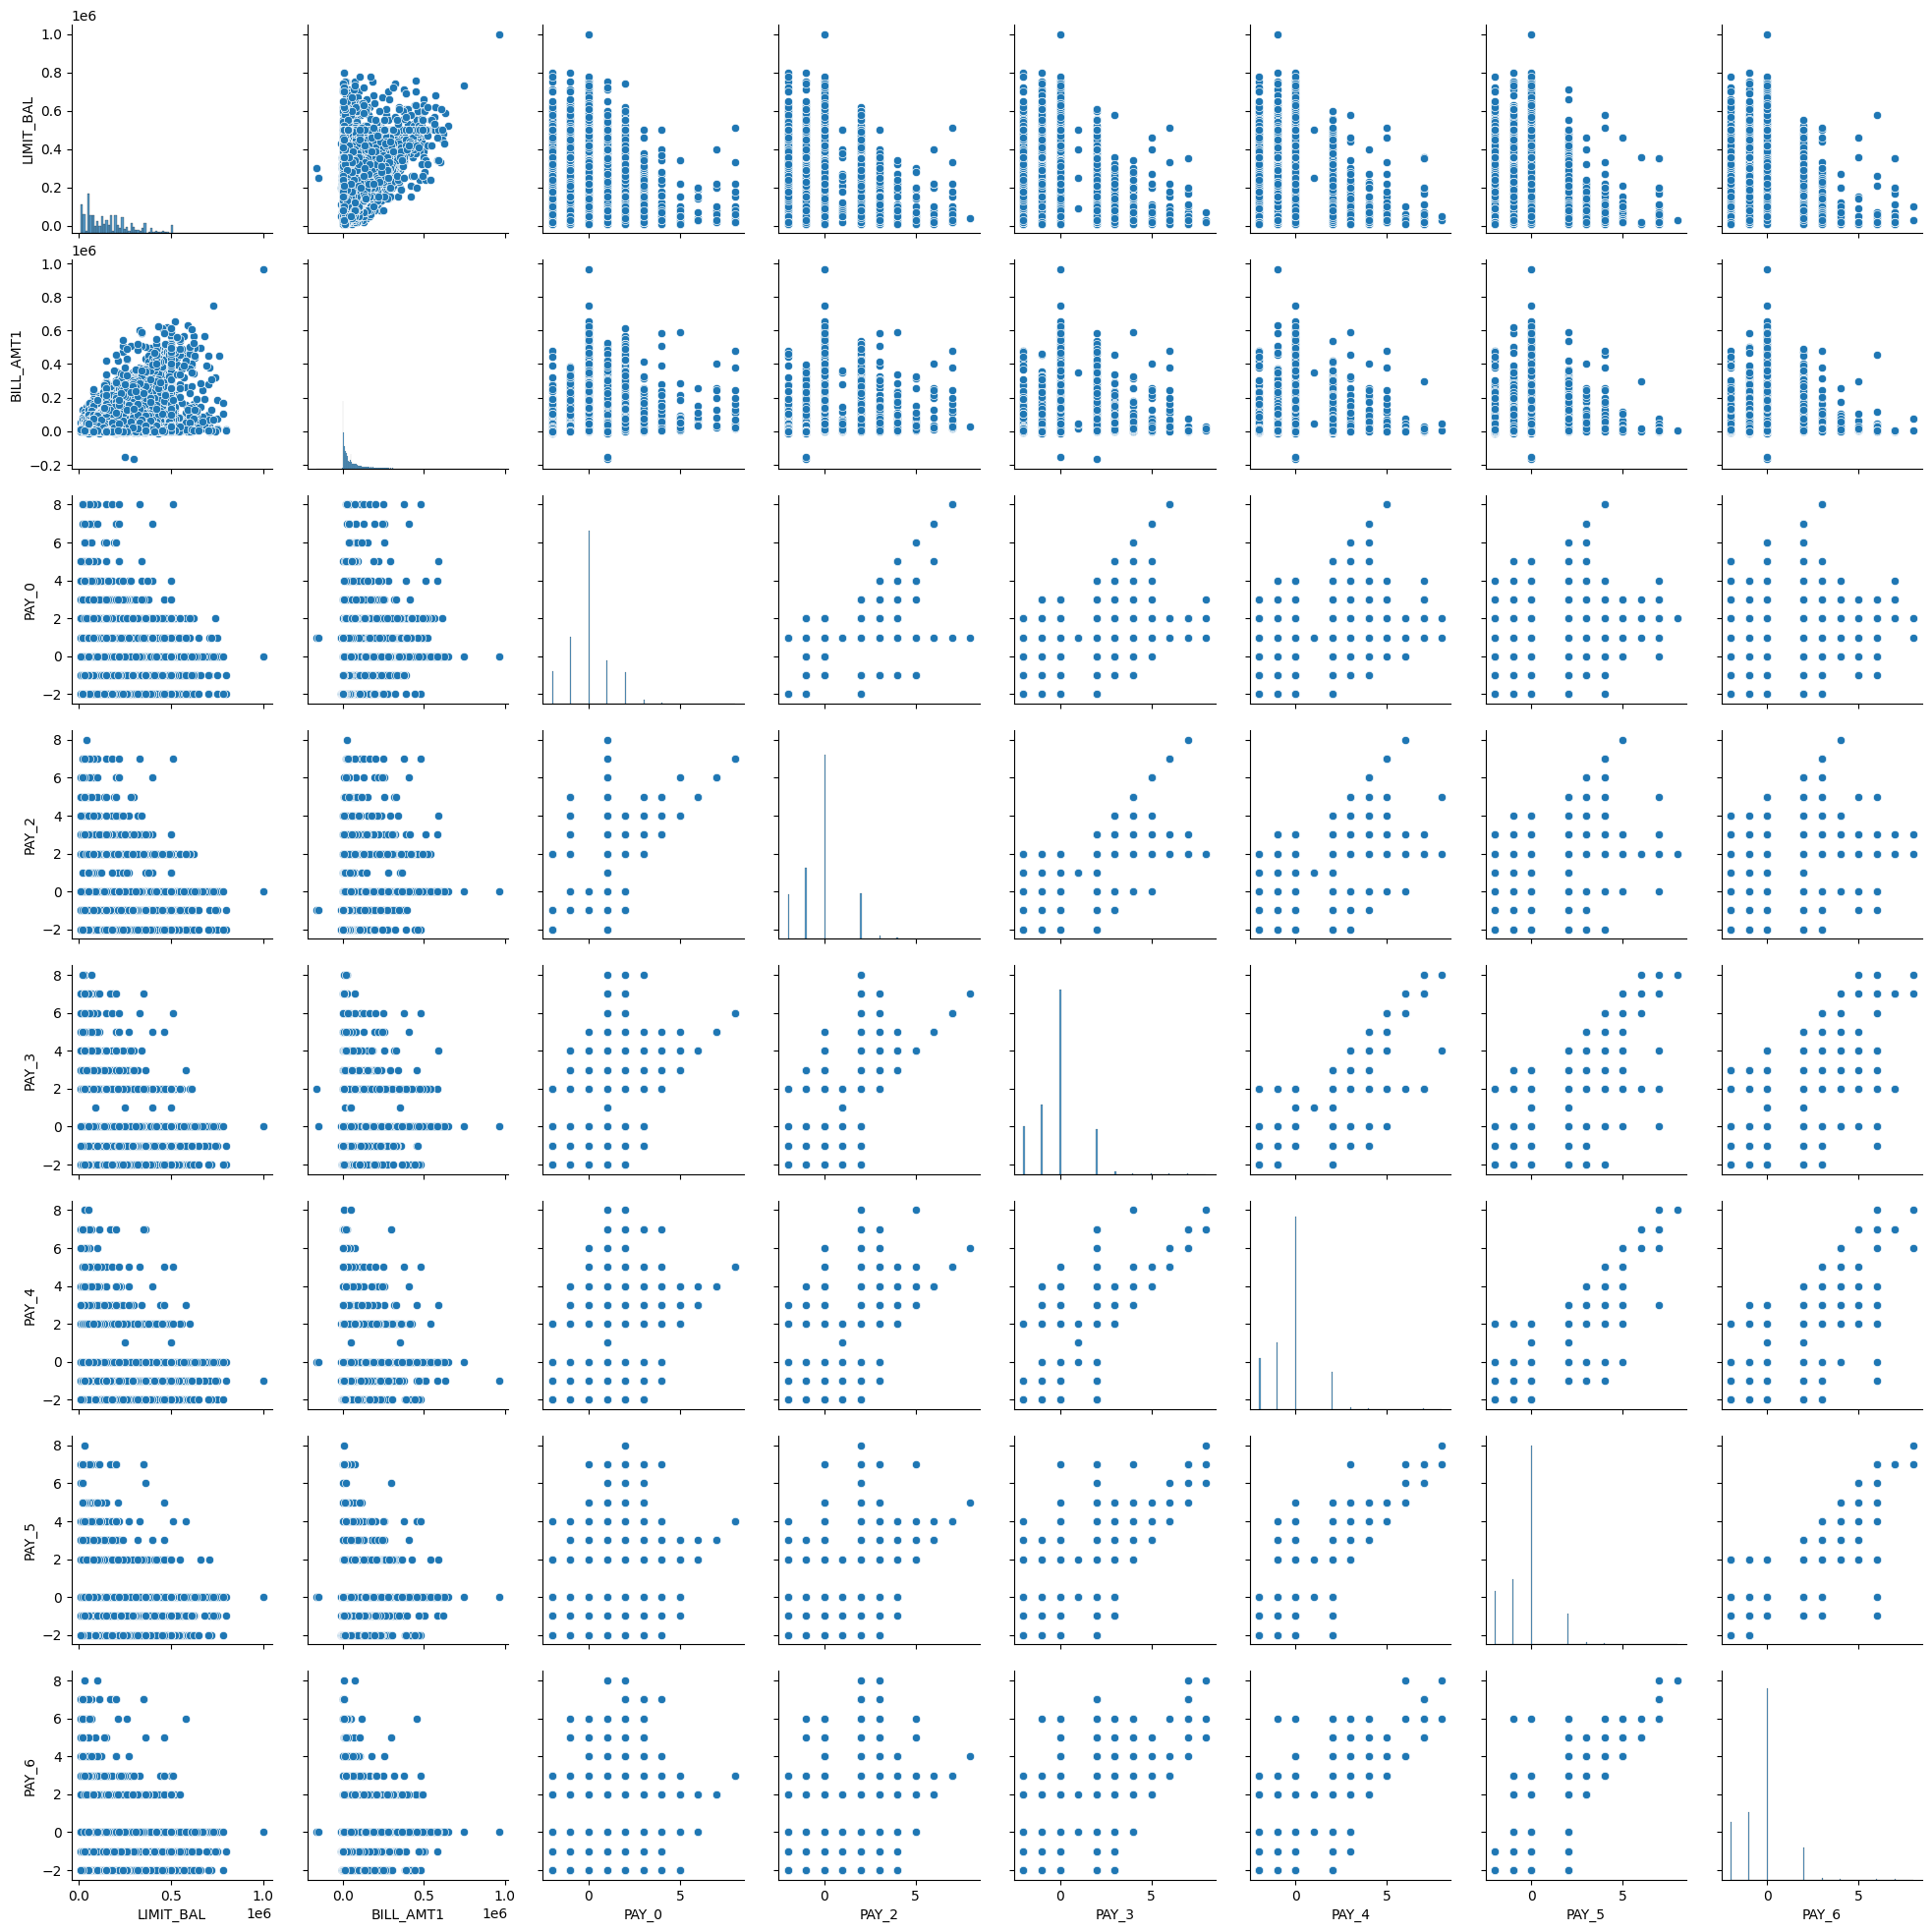

In [18]:
selected_features = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
sns.pairplot(df[selected_features])
plt.show()

In [19]:




# Define the target variable and feature columns
X = df.drop(columns=['ID', 'default payment next month'])
y = df['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply one-hot encoding to categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Feature scaling for numerical features
numerical_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Combine the encoded categorical and scaled numerical features
X_train_processed = np.hstack((X_train_encoded, X_train_scaled))
X_test_processed = np.hstack((X_test_encoded, X_test_scaled))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.798
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4687
           1       0.63      0.18      0.28      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.58      0.58      6000
weighted avg       0.77      0.80      0.75      6000



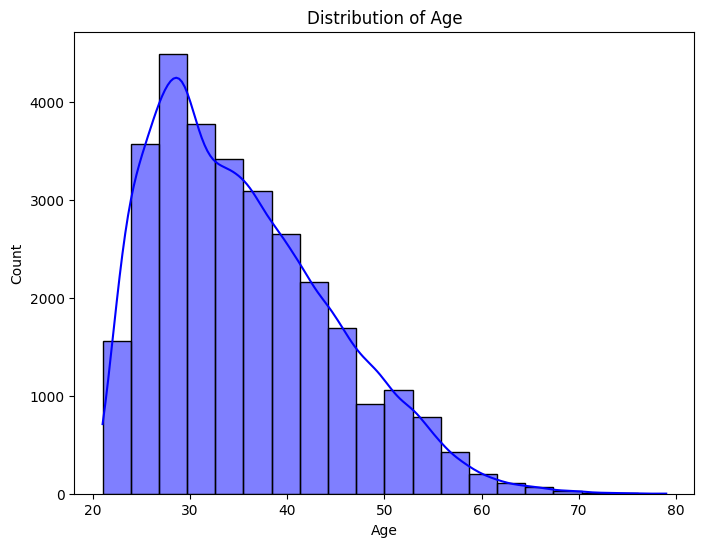

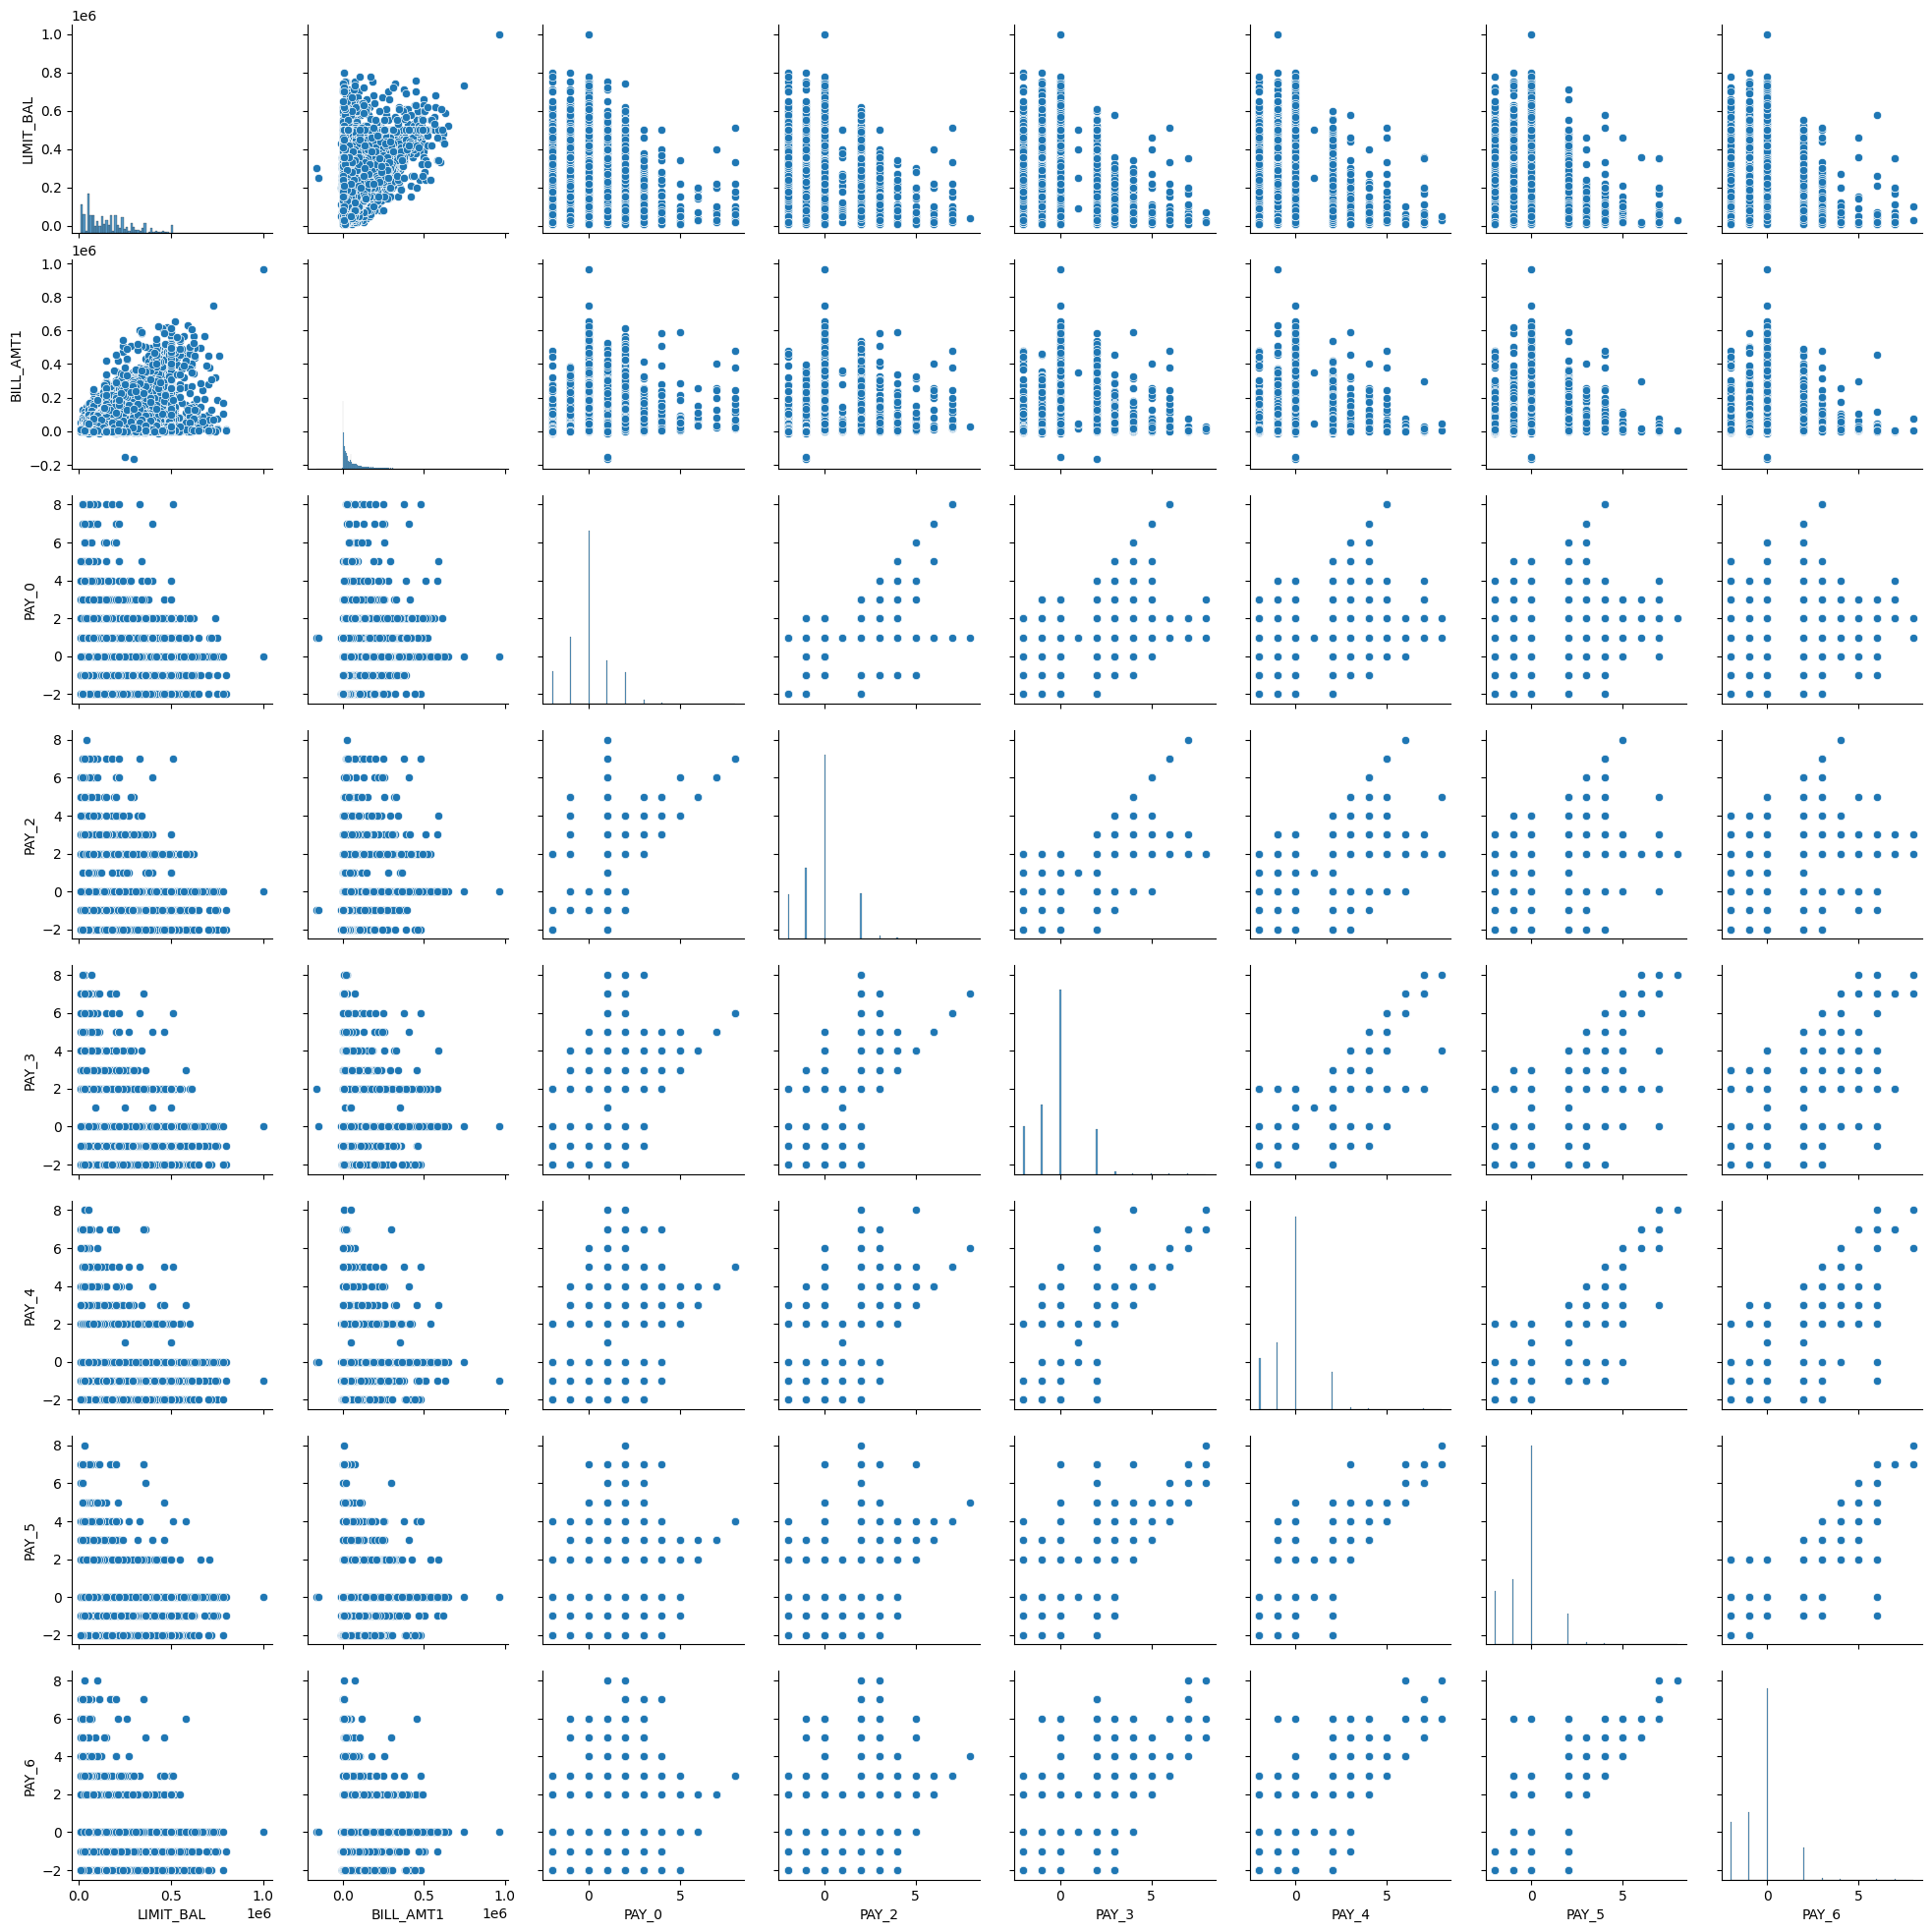

In [20]:




# Histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], kde=True, color='blue', bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Pairplot of selected features
selected_features = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
sns.pairplot(df[selected_features])
plt.show()

In [21]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
